In [1]:
tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt

### Autocorrelation

In [3]:
msft = pd.read_csv("MSFT.csv", index_col = "Date", parse_dates = ["Date"])
msft.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [4]:
# Convert the daily data to weekly data
msft = msft.resample("W").last()

# Compute the percentage change of prices
msft_pct = msft.pct_change().dropna()

# Compute and print the autocorrelation of returns
auto_msft = msft_pct["Adj Close"].autocorr()
print("Autocorrelation of returns =", auto_msft.round(2))

Autocorrelation of returns = -0.16


In [5]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(msft)

# Compute the approximate confidence interval
conf = 1.96 / sqrt(nobs)
print("Approximate confidence interval =", "{:.2f}".format(conf))

Approximate confidence interval = 0.12


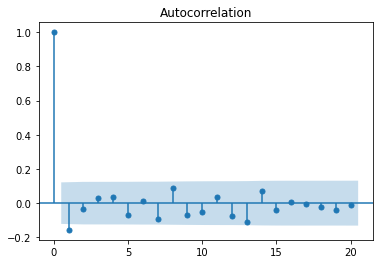

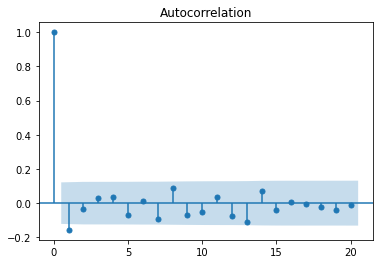

In [6]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(msft_pct, alpha = 0.05, lags = 20)

### Compute the ACF

In [7]:
hrb = pd.read_csv("HRB.csv")

# Compute the acf array of HRB
hrb_list = acf(hrb["Earnings"])
print(hrb_list)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


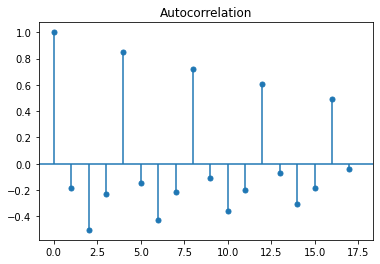

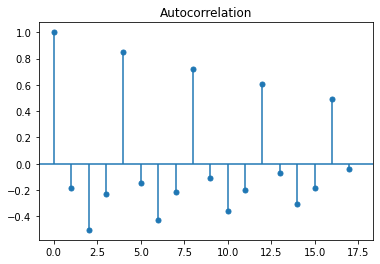

In [8]:
# Plot the acf function
plot_acf(hrb_list, alpha = 1)

### Can't Forecast White Noise

The mean is 0.022 and the standard deviation is 0.050


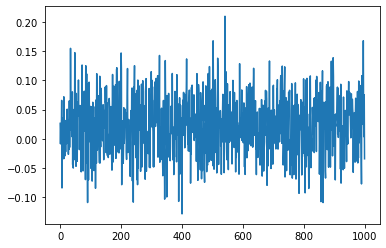

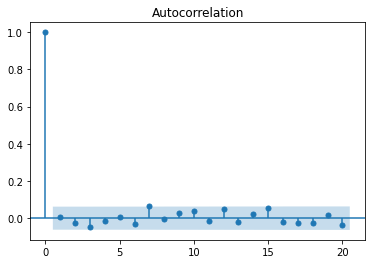

In [9]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Generate a Random Walk

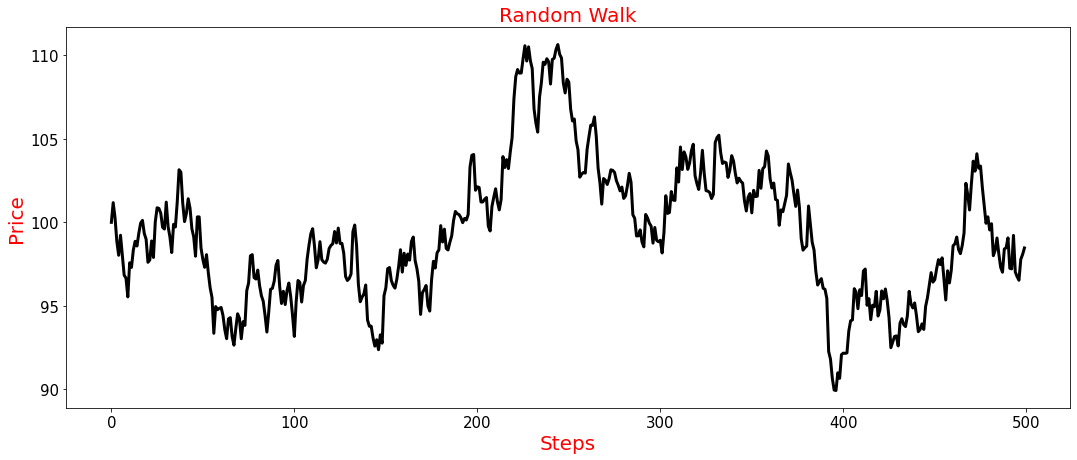

In [10]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc = 0,
                         scale = 1,
                         size = 500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.figure(figsize = (18, 7))
plt.plot(P, linewidth = 3, color = "black")
plt.title("Random Walk", size = 20, color = "red")
plt.ylabel("Price", color = "red", size = 20)
plt.xlabel("Steps", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Simulated Random Walk with Drift

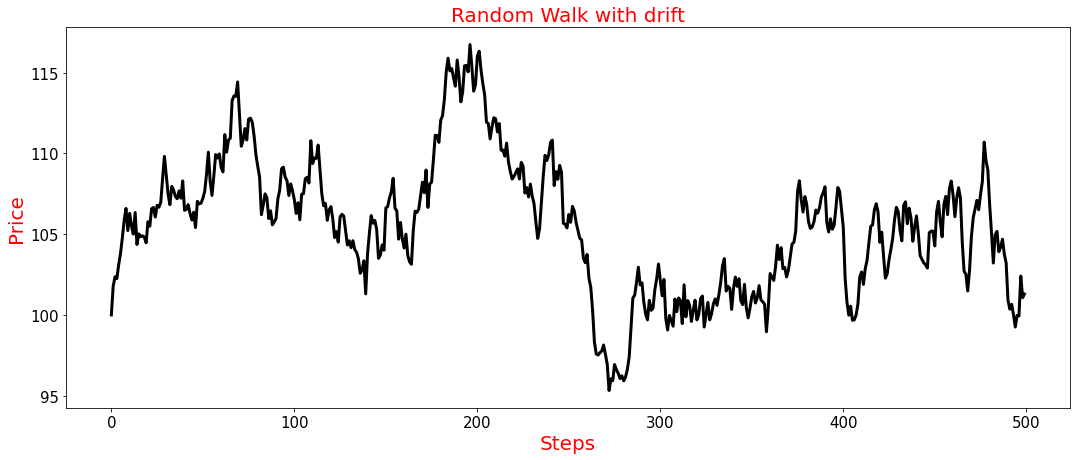

In [11]:
# Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1%
steps = np.random.normal(loc = 0.001,
                         scale = 0.01,
                         size = 500) + 1

# Set first element to 1
steps[0] = 1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.figure(figsize = (18, 7))
plt.plot(P, linewidth = 3, color = "black")
plt.title("Random Walk with drift", size = 20, color = "red")
plt.ylabel("Price", color = "red", size = 20)
plt.xlabel("Steps", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Are Amazon Stock Prices a Random Walk?

In [12]:
amzn = pd.read_csv("AMZN.csv")

# Run the ADF test on the price series and print out the results
results = adfuller(amzn["Adj Close"])

# Just print out the p-value
results[1]

1.0

### Are Amazon Returns a Random Walk?

In [13]:
# Create a DataFrame of AMZN returns
amzn_ret = amzn["Adj Close"].pct_change()

# Eliminate the NaN in the first row of returns
amzn_ret = amzn_ret.dropna()

# Run the ADF test on the return series and print out the p-value
result = adfuller(amzn_ret)

if result[1] > 0.05:
    print("Random Walk")
else:
    print("No Random Walk")

No Random Walk


### Simulate AR(1) Time Series

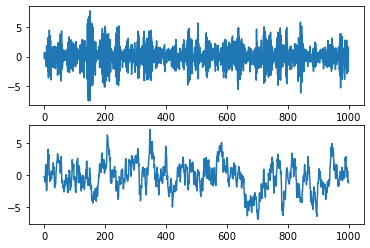

In [14]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, 0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, -0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

### Estimating an AR Model

In [15]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1377.375
Method:                       css-mle   S.D. of innovations              0.958
Date:                Sun, 16 Jan 2022   AIC                           2760.750
Time:                        22:53:03   BIC                           2775.473
Sample:                             0   HQIC                          2766.346
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.016      1.282      0.200      -0.011       0.052
ar.L1.y       -0.9014      0.014    -66.375      0.000      -0.928      -0.875
                                    Roots           

### Forecasting with an AR Model

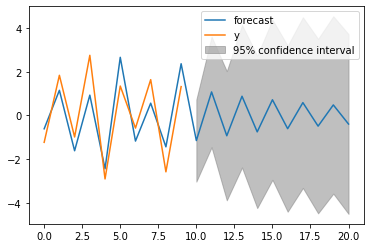

In [16]:
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Forecast Microsoft Stock

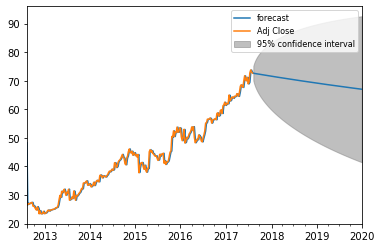

In [17]:
# Forecast interest rates using an AR(1) model
mod = ARMA(msft, order = (1, 0))

res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2020')
plt.legend(fontsize=8)
plt.show()

### Compare AR Model with Random Walk

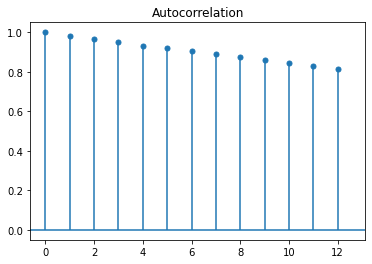

In [18]:
fig = plot_acf(msft, alpha=1, lags=12)

### Estimate Order of Model: PACF

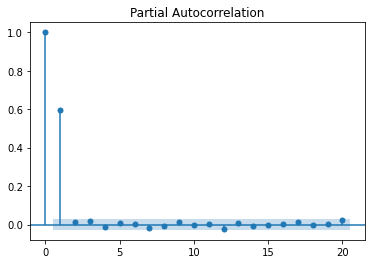

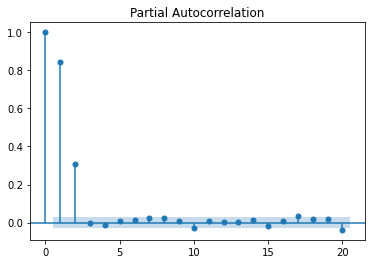

In [19]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)


# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

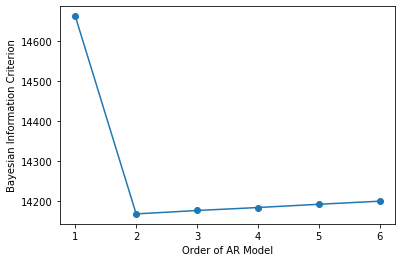

In [20]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

### Simulate MA(1) Time Series

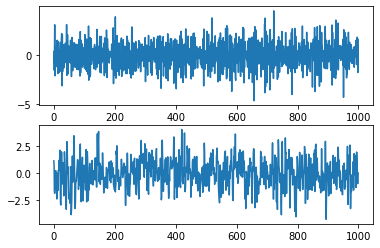

In [21]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

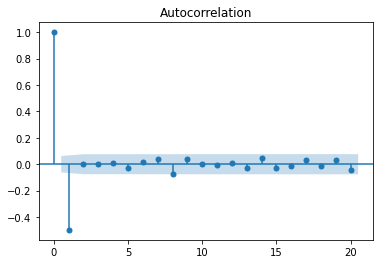

In [22]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

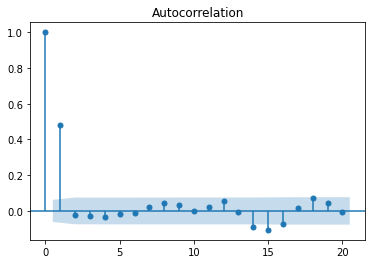

In [23]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags = 20)
plt.show()